In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
sys.path.append("../code")
import model
import parametros

Mean of distribution: 0.01
Mean of distribution: 0.008
Mean of distribution: 0.018


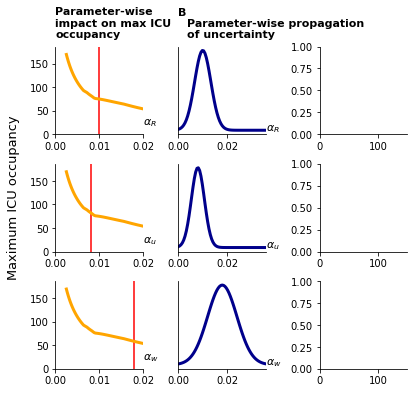

In [37]:
alphas =np.round(1/np.linspace(50, 400, 100), decimals=4)

fig = plt.figure(figsize=(8*2/3, 8*2/3), constrained_layout=True, frameon=False)
grid = fig.add_gridspec(ncols=3, nrows=3, wspace=0.1)

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1])
ax3 = fig.add_subplot(grid[2])
ax4 = fig.add_subplot(grid[3], sharex=ax1)
ax5 = fig.add_subplot(grid[4], sharex=ax2)
ax6 = fig.add_subplot(grid[5], sharex=ax3)
ax7 = fig.add_subplot(grid[6], sharex=ax1)
ax8 = fig.add_subplot(grid[7], sharex=ax2)
ax9 = fig.add_subplot(grid[8], sharex=ax3)

for i in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)

c = {
    'low':'green', 'mid':'orange', 'high':'red', 'free':'blue',
    'line':'gray', 'ICUcap':'#FFAAAA'}
tmp = [c['low'],c['mid'],c['high']]
    
ax1.set_xlim(0, alphas[0])
ax2.set_xlim(0, parametros.params['alpha_w']*2)
ax3.set_xlim(0,150)


#ax1.text(-.15,1.35,'A', size=11, weight='bold', color='black', transform=ax1.transAxes)
ax2.text(0,1.35,'B', size=11, weight='bold', color='black', transform=ax2.transAxes)

fig.text(0,1.1,'Parameter-wise\nimpact on max ICU\noccupancy', size=11, weight='bold', color='black', transform=ax1.transAxes)
fig.text(0.1,1.1,'Parameter-wise propagation\nof uncertainty', size=11, weight='bold', color='black', transform=ax2.transAxes)

fig.text(-0.05, 0.5, 'Maximum ICU occupancy', va='center', rotation='vertical', size=13)

ax1.text(0.02,20, '$α_R$', size=11)
ax4.text(0.02,20, '$α_u$', size=11)
ax7.text(0.02,20, '$α_w$', size=11)

ax2.text(2*parametros.params['alpha_w'],0, '$α_R$', size=11)
ax5.text(2*parametros.params['alpha_w'],0, '$α_u$', size=11)
ax8.text(2*parametros.params['alpha_w'],0, '$α_w$', size=11)

#DATA  
sweep=[]
icu_r=[]
icu_u=[]
icu_w=[]

for alph in alphas:
    with open(f"../datamodelruns/alpha_r/sweep/alphaR={alph}.pickle", "rb") as alphaR:
        mr=pickle.load(alphaR)
        sweep.append(alph)
        icu_r.append(np.max(mr.chopped_data()[:,7]))
        
for alph in alphas:
    with open(f"../datamodelruns/alpha_r/sweep/alphaR={alph}.pickle", "rb") as alphaU:
        mu=pickle.load(alphaU)
        icu_u.append(np.max(mu.chopped_data()[:,7]))
        
for alph in alphas:
    with open(f"../datamodelruns/alpha_r/sweep/alphaR={alph}.pickle", "rb") as alphaW:
        mw=pickle.load(alphaW)
        icu_w.append(np.max(mw.chopped_data()[:,7]))

for idx,i in enumerate([[ax1,'alpha_R', icu_r], [ax4,'alpha_u', icu_u], [ax7,'alpha_w', icu_w]]):
    i[0].plot(np.array(sweep),i[2], linewidth=3, color=tmp[1])
    
    i[0].set_ylim(0,np.max(maxicu)*1.1)
    alphar_default = parametros.params[i[1]]
    i[0].vlines(alphar_default, 0, np.max(maxicu)*1.1, color='red')



#Second Column
x=np.linspace(0,3*parametros.params['alpha_w'],100)

for idx,i in enumerate([[ax2,'alpha_R'], [ax5,'alpha_u'], [ax8,'alpha_w']]):
    mean = parametros.params[i[1]]
    print('Mean of distribution:', mean)
    sigma = mean/3
    probdensity = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mean)**2/(2*sigma**2))
    i[0].plot(x,probdensity, linewidth=3, color='darkblue')
    i[0].set_yticks([])